# Successful Reddit Posts

The file `askscience_data.csv` is a collection of posts from the subreddit r/askscience. The task comes with two parts:

1. Determine the attributes of a successful post on r/askscience
2. Build a model that can predict the score of a post on r/askscience given at least the title and body of the post.

## Part 1: Determine the Attributes of A Successful Post
Our data comes in a tabular format with the following columns:
|id|title|body|tag|datetime|author|score|upvote_ratio|url|
|---|---|---|---|---|---|---|---|---|
|-|IV|IV|IV|IV|-|T|-|-|

The columns `[id, author, url]` are not considered for analysis since they are all identifiers. Perhaps we could use `author` if we had some information on them, which is not the case for this experiment. The column `upvote_ratio` is not also considered as it is highly correlated with the target variable `score` (r = 0.55).

To find the attributes that contribute the most to the success of a post, I include the features one by one and examine their effects in improving the models' performance.

To annotate the reddit posts as **_successful_**, I use the threshold **score $\ge$ 100**, which results in a balanced dataset of positive and negative samples.

For all the analysis, 80% of the data (randomly chosen) are used for training and the performance of models and features are tested on the remaining 20%.

### Methodology
Previous works have suggested the following features for similar tasks:
|Column|Feature|Source|
|---|---|---|
|title|TF-IDF, BoW|\[1\]|
|body|TF-IDF, BoW|\[2\]|
|datetime|hour of day|\[3\]|

I introduce one-hot-encoding for `tag` column, as there are only 33 unique tags in our dataset.

I also show how to learn and use _Embeddings_ for this dataset for a deep neural network (see my notes for _deep neural networks_).

...<br>
$_{\text{[1] "Classifying reddit post titles to subreddit"}}$<br>
$_{\text{[2] "What's in the name? Understanding the interplay between titles, content, and communities in social media."}}$<br>
$_{\text{[3] "Widespread underprovision on reddit."}}$

### Results
Different models were trained and evaluated on the test set (20% randomly chosen). The results are shown below:

|Attributes|Model|Accuracy|
|---|---|---|
|title|Logistic Regression|61%|
|title|Random Forest|71%|
|title|SVM + RBF kernel|**74%**|
|title|Embedding + DN|58%|
||||
|title + body|Logistic Regression|63%|
|title + body|Random Forest|72%|
|title + body|SVM + RBF kernel|**73%**|
||||
|title + tag| Logistic Regression | 63% |
|title + tag| Random Forest | **73%** |
|title + tag| SVM + RBF kernel | 71%|
||||
|title + datetime| Logistic Regression | 62% |
|title + datetime| Random Forest | **74%** |
|title + datetime| SVM + RBF kernel | 59% |
||||
|title + tag + datetime| Logistic Regression | 65% |
|title + tag + datetime| Random Forest | **75%** |
|title + tag + datetime| SVM + RBF kernel | 60% |

**Conclusion:**
* The most important attribute for a successful post is the `title` of the post.
* Including `body` added no (or negligible) benefit to the classification task.
* `tag` and `datetime` seemed to have positive effects (more obvious for the linear model), but they were not significant.

### Notes
There are several areas that could potentially improve the overall quality of this experiment:
* I performed hyperparameter tuning for all the mentioned methods (especially, for Random Forest and DN); however, due to time limitation, more thorough hyperparameter tuning were not conducted.
* I did a quick research on the features proposed in this domain, but perhaps there were many more that I did not find at the moment. So, I limited the feature engineering aspect to those explained in the _Methodology_ section.
* I implemented the **Embedding + Deep Neural Network** just to demonstrate how I would approach this problem in this domain. However, the amount of available data were not sufficient for creating a model from scratch. I believe using a pretrained model for similar tasks, in addition to the network I introduced in this section as the top layer, could achieve a better result. At the moment, I could not find a relevant model to experiment my hypothesis.

Please see my codes for this part of the takehome below, after "Part 2".

## Part 2: Build a Model to Predict Reddit Post Scores
For this part of the task, I use the same datasets that I created for the previous part. Since we are predicting a numerical value (`score`), I consider this as a regression problem.

There are some outliers in our data (`score` > 20,000) that will have a huge impact on our model's performance. For my analysis, I excluded those samples.

The best performance was achieved by Linear Regression model on `title` and `hour` dataset. However, the performance was far from ideal (rMSE=4665). The result was expected since
* The number of features were too high for Random Forest.
* The features (TF-IDF) had no linear relationship with the target variable.
* SVM with RBF kernel calculates similarities between data points; therefore, the dimensionality would be reduced. However, that does not mean that it would find the right "decision street".


### Improvements (future works)
Some improvements come to my mind:

1. As was found in data exploration, almost 40% of our samples have `score` <5. Therefore, a cascaded model could be beneficial for increasing our models' predictions; i.e., a classifier would predict whether a post is _ignored_ or not (`score` < 5), and then the label would be fed to the regression model as an independent variable.
2. Although TF-IDF features determine the importance of some words that are helpful for identifying "succesful" posts, it does not provide enough information to predict the "score" itself. Therefore, better features should be calculated. (I did not find relevant works for this, but my research on this topic was not thorough. Perhaps there are related works that I missed)
3. Some works suggested some type of "sentiment analysis" as a feature for predicting "popularity". Although, those are not exactly aiming for predicting "score" values, such feature could be beneficial here as well. That brings me to the point I mentioned for the classification task too. A relevant base model for calculating embeddings/feature vectors, could help in building a neural network that was more suitable for this task.

## Data Preparation

In [86]:
import pandas as pd
import numpy as np

df = pd.read_csv('askscience_data.csv')
df.head()

,Unnamed: 0,title,body,tag,datetime,author,score,upvote_ratio,url
0,0,Post viral cough: why does it get worse after ...,Tl;dr: why is your cough during an upper respi...,Human Body,2022-12-09 02:52:07,CarboniferousCreek,1343.0,0.93,https://www.reddit.com/r/askscience/comments/z...
1,1,Can an x-ray of an adult show chronic malnouri...,If a person was chronically undernourished thr...,Human Body,2022-12-08 18:28:51,Foxs-In-A-Trenchcoat,426.0,0.91,https://www.reddit.com/r/askscience/comments/z...
2,2,[META] Bots and AI tools on r/askscience,\n\nOver the past few days we have seen a sur...,META,2022-12-08 09:04:25,AskScienceModerator,2218.0,0.92,https://www.reddit.com/r/askscience/comments/z...
3,3,Can you predictably manipulate a magnetic gas?,Does there exist a gas that changes in respons...,Physics,2022-12-08 20:01:53,hufsa7,48.0,0.83,https://www.reddit.com/r/askscience/comments/z...
4,4,Are there cells in humans (or other mammals) t...,NaN,Medicine,2022-12-09 01:11:34,Velym,14.0,0.89,https://www.reddit.com/r/askscience/comments/z...


#### Split the data into training and test sets
I set aside 20% of data (randomly chosen) as the test set.

In [87]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

train_df_raw, test_df_raw = train_test_split(df, test_size=0.2, random_state=42)
print(f'training set size: {train_df_raw.shape[0]}\tvs\ttest set size: {test_df_raw.shape[0]}')

training set size: 3364	vs	test set size: 841


#### Data exploration
Let's check the correlation between `upvote_ratio` and `score`.

In [9]:
import numpy as np

r = np.corrcoef(train_df_raw.upvote_ratio, train_df_raw.score)
print(f'There is a {r[0][1]} correlation between upvote_ratio and score.')

There is a 0.5501576124022011 correlation between upvote_ratio and score.


Now, let's look at the distribution of `score` values for our samples.

<Axes: >

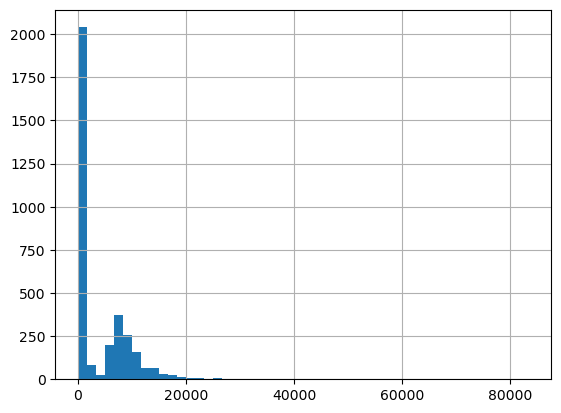

In [10]:
train_df_raw.score.hist(bins=50)

Almost half of the data have `score` $\le$ 100. There are also ~50 samples that have a very high `score` value (>20,000), and should be considered as outliers for the regression tasks.

#### Data annotation and feature engineering
* We define positive class as `score > 100`.
* We calculate the following features:
    * TF-IDF representation for title.
    * TF-IDF representation for title and body (concatenated).
    * One-hot-encoding for tag.
    * Hour from datetime.

In [88]:
train_df_raw['successful'] = np.where(train_df_raw['score'] > 100, True, False)
test_df_raw['successful'] = np.where(test_df_raw['score'] > 100, True, False)
print("Data are annotated based on the score values.")

Data are annotated based on the score values.


First, we create a dataset considering only the title of posts.

In [89]:
import nltk
import re
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download("stopwords")
nltk.download('wordnet')

def removeStopWords(texts):
    stopwords = nltk.corpus.stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    
    clean_texts = []
    for i in range(len(texts)):
        text = texts[i]
        clean_text = re.sub('[^a-zA-Z]', ' ', str(text))
        clean_text = clean_text.lower()
        clean_text = clean_text.split()
        clean_text = [lemmatizer.lemmatize(word) for word in clean_text if word not in set(stopwords)]
        clean_text = ' '.join(clean_text)
        clean_texts.append(clean_text)

    return clean_texts

[nltk_data] Downloading package stopwords to /Users/matin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/matin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [90]:
train_titles = removeStopWords(train_df_raw.title.values)
test_titles = removeStopWords(test_df_raw.title.values)

In [91]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer.fit(train_titles)

train_title_tfidf = tf_idf_vectorizer.transform(train_titles)
test_title_tfidf = tf_idf_vectorizer.transform(test_titles)

In [92]:
column_names = ['tfidf_{}'.format(i) for i in range(train_title_tfidf.shape[1])]
train_title_df = pd.DataFrame(train_title_tfidf.toarray(), columns=column_names)
train_title_df['successful'] = train_df_raw.successful.values
test_title_df = pd.DataFrame(test_title_tfidf.toarray(), columns=column_names)
test_title_df['successful'] = test_df_raw.successful.values

Next, we create a dataset for title and body.

In [93]:
def concatenateTitleAndBody(titles, bodies):
    result = []
    for i in range(len(titles)):
        title = titles[i]
        body = bodies[i]
        if str(body) == 'nan':
            result.append(title)
            continue
        result.append(title + ' ' + body)
    return result

In [94]:
train_titles_bodies = removeStopWords(concatenateTitleAndBody(train_df_raw.title.values, train_df_raw.body.values))
test_titles_bodies = removeStopWords(concatenateTitleAndBody(test_df_raw.title.values, test_df_raw.body.values))

In [95]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer.fit(train_titles_bodies)

train_titlebody_tfidf = tf_idf_vectorizer.transform(train_titles_bodies)
test_titlebody_tfidf = tf_idf_vectorizer.transform(test_titles_bodies)

In [96]:
column_names = ['tfidf_{}'.format(i) for i in range(train_titlebody_tfidf.shape[1])]
train_titlebody_df = pd.DataFrame(train_titlebody_tfidf.toarray(), columns=column_names)
train_titlebody_df['successful'] = train_df_raw.successful.values
test_titlebody_df = pd.DataFrame(test_titlebody_tfidf.toarray(), columns=column_names)
test_titlebody_df['successful'] = test_df_raw.successful.values

Next, we create a dataset considering titles and tags.

In [97]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(dtype=np.int16, handle_unknown='infrequent_if_exist')
one_hot_encoder.fit(train_df_raw.tag.values.reshape(-1, 1))

training_tag_encodings = one_hot_encoder.transform(train_df_raw.tag.values.reshape(-1, 1))
tag_columns = ["tag_{}".format(i) for i in range(training_tag_encodings.shape[1])]
training_tags_df = pd.DataFrame(training_tag_encodings.toarray(), columns=tag_columns)

test_tag_encodings = one_hot_encoder.transform(test_df_raw.tag.values.reshape(-1, 1))
test_tags_df = pd.DataFrame(test_tag_encodings.toarray(), columns=tag_columns)

In [98]:
train_titletag_df = pd.concat([train_title_df, training_tags_df], axis=1)
test_titletag_df = pd.concat([test_title_df, test_tags_df], axis=1)

Next, we create a dataset from `title` and `datetime` attributes.

In [99]:
import datetime
from datetime import datetime

def timeOfDay(date_and_times):
    time_of_days = []
    for date_and_time in date_and_times:
        datetime_obj = datetime.strptime(date_and_time, "%Y-%m-%d %H:%M:%S")
        time_of_days.append(datetime_obj.hour)
        
    return time_of_days

In [100]:
train_titlehour_df = train_title_df.copy()
train_titlehour_df['hour'] = timeOfDay(train_df_raw.datetime.values)
test_titlehour_df = test_title_df.copy()
test_titlehour_df['hour'] = timeOfDay(test_df_raw.datetime.values)

Finally, we create a dataset with `title`, `tag`, and `hour`.

In [101]:
train_titletaghour_df = train_titletag_df.copy()
train_titletaghour_df['hour'] = timeOfDay(train_df_raw.datetime.values)
test_titletaghour_df = test_titletag_df.copy()
test_titletaghour_df['hour'] = timeOfDay(test_df_raw.datetime.values)

In [73]:
# Since some posts do not have tags, we have to drop data points with NaN values.
train_titletag_df.dropna(inplace=True)
train_titletaghour_df.dropna(inplace=True)
test_titletag_df.dropna(inplace=True)
test_titletaghour_df.dropna(inplace=True)

## Evaluations For Part 1 (Classification)

#### Evaluation on title-only dataset

In [43]:
# Model trainings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# We have more features than the number of samples. Therefore, we use 'l1' regularization
# to reduce the number of features invovled in the decision making.
log_clf = LogisticRegression(penalty='l1', solver='liblinear')
log_clf.fit(train_title_df.drop(['successful'], axis=1), train_title_df.successful)

# Evaluations
y_train_pred = log_clf.predict(train_title_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_title_df.successful.values, y_train_pred)}')
y_test_pred = log_clf.predict(test_title_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_title_df.successful.values, y_test_pred)}')

Accuracy on training set: 0.6777645659928656
Accuracy on test set: 0.6099881093935791


In [44]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_title_df.drop(['successful'], axis=1), train_title_df.successful)

# Evaluations
y_train_pred = rf_clf.predict(train_title_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_title_df.successful.values, y_train_pred)}')
y_test_pred = rf_clf.predict(test_title_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_title_df.successful.values, y_test_pred)}')

Accuracy on training set: 1.0
Accuracy on test set: 0.7110582639714625


In [45]:
svc_clf = SVC(kernel='rbf')
svc_clf.fit(train_title_df.drop(['successful'], axis=1), train_title_df.successful)

# Evaluations
y_train_pred = svc_clf.predict(train_title_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_title_df.successful.values, y_train_pred)}')
y_test_pred = svc_clf.predict(test_title_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_title_df.successful.values, y_test_pred)}')

Accuracy on training set: 0.9892984542211652
Accuracy on test set: 0.7395957193816884


##### Deep neural network with embeddings
This part is for demonstration of how a deep neural network can be built using an embedding layer for feature calculations.

The important part is showing how to build a vocabulary and feed it to neural network model.

The model here is built from scratch; we need many more data points for it to learn an efficient embedding. The better approach is to use a pretrained model as the base, and add this model as the top layer. Then we could use the dataset we have to fine-tune the top layers.

In [47]:
# Building a vocoabulary from titles.
from collections import Counter

vocabulary = Counter()
for text in train_titles:
    for word in text.split(' '):
        vocabulary.update([word])

vocabulary.most_common()[:5]

[('would', 293), ('like', 190), ('human', 170), ('earth', 167), ('get', 167)]

In [48]:
import tensorflow as tf

vocab_size = 10000
num_oov_buckets = 1000

truncated_vocabulary = [word for word, count in vocabulary.most_common()[:vocab_size]]
words = tf.constant(truncated_vocabulary)
word_ids = tf.range(len(truncated_vocabulary), dtype=tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

table.lookup(tf.constant([b'This is a great test'.split()]))

<tf.Tensor: shape=(1, 5), dtype=int64, numpy=array([[6860, 6435, 7054,  554,  107]])>

In [49]:
def encodeText(text, sentence_length=25):
    words = text.split()
    if len(words) < sentence_length:
        words = words + ['<pad>'] * (sentence_length - len(words))
    return table.lookup(tf.constant([words[:sentence_length]]))

In [50]:
from tensorflow import keras

tf.random.set_seed(42)
embed_size = 128

model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size, input_shape=[None]),
    keras.layers.Dense(512, activation='selu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='selu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='selu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1408000   
                                                                 
 dense (Dense)               (None, None, 512)         66048     
                                                                 
 dropout (Dropout)           (None, None, 512)         0         
                                                                 
 dense_1 (Dense)             (None, None, 256)         131328    
                                                                 
 dropout_1 (Dropout)         (None, None, 256)         0         
                                                                 
 dense_2 (Dense)             (None, None, 128)         32896     
                                                                 
 dense_3 (Dense)             (None, None, 1)           1

In [52]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
X_train_encoded = tf.convert_to_tensor(np.array([encodeText(text) for text in train_titles]).squeeze())
y_train_encoded = np.asarray(train_title_df.successful.values).astype('float32').reshape((-1,1))
history = model.fit(X_train_encoded, y_train_encoded, epochs=5)

Epoch 1/5


2023-09-07 14:30:43.768275: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


106/106 [==============================] - 1s 8ms/step - loss: 0.6926 - accuracy: 0.5490
Epoch 2/5
106/106 [==============================] - 1s 9ms/step - loss: 0.6821 - accuracy: 0.5837
Epoch 3/5
106/106 [==============================] - 1s 9ms/step - loss: 0.6702 - accuracy: 0.6036
Epoch 4/5
106/106 [==============================] - 1s 9ms/step - loss: 0.6615 - accuracy: 0.6112
Epoch 5/5
106/106 [==============================] - 1s 11ms/step - loss: 0.6583 - accuracy: 0.6085


In [53]:
X_test_encoded = tf.convert_to_tensor(np.array([encodeText(text) for text in test_titles]).squeeze())
y_test_encoded = np.asarray(test_title_df.successful.values).astype('float32').reshape((-1,1))

model.evaluate(X_test_encoded, y_test_encoded)

27/27 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5818


[0.6929308772087097, 0.5817835330963135]

As was expected, the DN model does not achieve high accuracy on either training set or test set. That means the model is underfitting the data.

#### Evaluation on {title and body} dataset

In [74]:
print("Logistic Regression")
log_clf = LogisticRegression(penalty='l1', solver='liblinear')
log_clf.fit(train_titlebody_df.drop(['successful'], axis=1), train_titlebody_df.successful)

# Evaluations
y_train_pred = log_clf.predict(train_titlebody_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_titlebody_df.successful.values, y_train_pred)}')
y_test_pred = log_clf.predict(test_titlebody_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_titlebody_df.successful.values, y_test_pred)}')

Accuracy on training set: 0.6917360285374554
Accuracy on test set: 0.6278240190249703


In [75]:
print("Random Forest")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_titlebody_df.drop(['successful'], axis=1), train_titlebody_df.successful)

# Evaluations
y_train_pred = rf_clf.predict(train_titlebody_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_titlebody_df.successful.values, y_train_pred)}')
y_test_pred = rf_clf.predict(test_titlebody_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_titlebody_df.successful.values, y_test_pred)}')

Random Forest
Accuracy on training set: 1.0
Accuracy on test set: 0.7217598097502973


In [76]:
print("SVM + RBF kernel")
svc_clf = SVC(kernel='rbf')
svc_clf.fit(train_titlebody_df.drop(['successful'], axis=1), train_titlebody_df.successful)

# Evaluations
y_train_pred = svc_clf.predict(train_titlebody_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_titlebody_df.successful.values, y_train_pred)}')
y_test_pred = svc_clf.predict(test_titlebody_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_titlebody_df.successful.values, y_test_pred)}')

SVM + RBF kernel
Accuracy on training set: 0.9907847800237812
Accuracy on test set: 0.7288941736028538


#### Evaluation on {title and tag} dataset

In [77]:
print("Logistic Regression")
log_clf = LogisticRegression(penalty='l1', solver='liblinear')
log_clf.fit(train_titletag_df.drop(['successful'], axis=1), train_titletag_df.successful)

# Evaluations
y_train_pred = log_clf.predict(train_titletag_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_titletag_df.successful.values, y_train_pred)}')
y_test_pred = log_clf.predict(test_titletag_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_titletag_df.successful.values, y_test_pred)}')

Logistic Regression
Accuracy on training set: 0.6932223543400713
Accuracy on test set: 0.633769322235434


In [78]:
print("Random Forest")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_titletag_df.drop(['successful'], axis=1), train_titletag_df.successful)

# Evaluations
y_train_pred = rf_clf.predict(train_titletag_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_titletag_df.successful.values, y_train_pred)}')
y_test_pred = rf_clf.predict(test_titletag_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_titletag_df.successful.values, y_test_pred)}')

Random Forest
Accuracy on training set: 1.0
Accuracy on test set: 0.7288941736028538


In [79]:
print("SVM + RBF kernel")
svc_clf = SVC(kernel='rbf')
svc_clf.fit(train_titletag_df.drop(['successful'], axis=1), train_titletag_df.successful)

# Evaluations
y_train_pred = svc_clf.predict(train_titletag_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_titletag_df.successful.values, y_train_pred)}')
y_test_pred = svc_clf.predict(test_titletag_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_titletag_df.successful.values, y_test_pred)}')

SVM + RBF kernel
Accuracy on training set: 0.9530321046373365
Accuracy on test set: 0.7063020214030915


#### Evaluation on {title and hour} dataset

In [80]:
print("Logistic Regression")
log_clf = LogisticRegression(penalty='l1', solver='liblinear')
log_clf.fit(train_titlehour_df.drop(['successful'], axis=1), train_titlehour_df.successful)

# Evaluations
y_train_pred = log_clf.predict(train_titlehour_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_titlehour_df.successful.values, y_train_pred)}')
y_test_pred = log_clf.predict(test_titlehour_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_titlehour_df.successful.values, y_test_pred)}')

Logistic Regression
Accuracy on training set: 0.6843043995243757
Accuracy on test set: 0.6254458977407847


In [81]:
print("Random Forest")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_titlehour_df.drop(['successful'], axis=1), train_titlehour_df.successful)

# Evaluations
y_train_pred = rf_clf.predict(train_titlehour_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_titlehour_df.successful.values, y_train_pred)}')
y_test_pred = rf_clf.predict(test_titlehour_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_titlehour_df.successful.values, y_test_pred)}')

Random Forest
Accuracy on training set: 1.0
Accuracy on test set: 0.7360285374554102


In [82]:
print("SVM + RBF kernel")
svc_clf = SVC(kernel='rbf')
svc_clf.fit(train_titlehour_df.drop(['successful'], axis=1), train_titlehour_df.successful)

# Evaluations
y_train_pred = svc_clf.predict(train_titlehour_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_titlehour_df.successful.values, y_train_pred)}')
y_test_pred = svc_clf.predict(test_titlehour_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_titlehour_df.successful.values, y_test_pred)}')

SVM + RBF kernel
Accuracy on training set: 0.6019619500594531
Accuracy on test set: 0.5897740784780023


#### Evaluation on {title, tag, and hour} dataset

In [83]:
print("Logistic Regression")
log_clf = LogisticRegression(penalty='l1', solver='liblinear')
log_clf.fit(train_titletaghour_df.drop(['successful'], axis=1), train_titletaghour_df.successful)

# Evaluations
y_train_pred = log_clf.predict(train_titletaghour_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_titletaghour_df.successful.values, y_train_pred)}')
y_test_pred = log_clf.predict(test_titletaghour_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_titletaghour_df.successful.values, y_test_pred)}')

Logistic Regression
Accuracy on training set: 0.6970868014268727
Accuracy on test set: 0.6504161712247325


In [84]:
print("Random Forest")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_titletaghour_df.drop(['successful'], axis=1), train_titletaghour_df.successful)

# Evaluations
y_train_pred = rf_clf.predict(train_titletaghour_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_titletaghour_df.successful.values, y_train_pred)}')
y_test_pred = rf_clf.predict(test_titletaghour_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_titletaghour_df.successful.values, y_test_pred)}')

Random Forest
Accuracy on training set: 1.0
Accuracy on test set: 0.7502972651605232


In [85]:
print("SVM + RBF kernel")
svc_clf = SVC(kernel='rbf')
svc_clf.fit(train_titletaghour_df.drop(['successful'], axis=1), train_titletaghour_df.successful)

# Evaluations
y_train_pred = svc_clf.predict(train_titletaghour_df.drop(['successful'], axis=1))
print(f'Accuracy on training set: {accuracy_score(train_titletaghour_df.successful.values, y_train_pred)}')
y_test_pred = svc_clf.predict(test_titletaghour_df.drop(['successful'], axis=1))
print(f'Accuracy on test set: {accuracy_score(test_titletaghour_df.successful.values, y_test_pred)}')

SVM + RBF kernel
Accuracy on training set: 0.6111771700356718
Accuracy on test set: 0.6016646848989299


## Evaluations For Part 2 (Regression)

#### Preparing datasets for regression

In [102]:
train_title_df = train_title_df.drop(['successful'], axis=1)
train_title_df['score'] = train_df_raw.score.values
test_title_df = test_title_df.drop(['successful'], axis=1)
test_title_df['score'] = test_df_raw.score.values

In [105]:
train_titlebody_df.drop(['successful'], axis=1, inplace=True)
train_titlebody_df['score'] = train_df_raw.score.values
test_titlebody_df.drop(['successful'], axis=1, inplace=True)
test_titlebody_df['score'] = test_df_raw.score.values

In [106]:
train_titletag_df.drop(['successful'], axis=1, inplace=True)
train_titletag_df['score'] = train_df_raw.score.values
test_titletag_df.drop(['successful'], axis=1, inplace=True)
test_titletag_df['score'] = test_df_raw.score.values

In [107]:
train_titlehour_df.drop(['successful'], axis=1, inplace=True)
train_titlehour_df['score'] = train_df_raw.score.values
test_titlehour_df.drop(['successful'], axis=1, inplace=True)
test_titlehour_df['score'] = test_df_raw.score.values

In [108]:
train_titletaghour_df.drop(['successful'], axis=1, inplace=True)
train_titletaghour_df['score'] = train_df_raw.score.values
test_titletaghour_df.drop(['successful'], axis=1, inplace=True)
test_titletaghour_df['score'] = test_df_raw.score.values

In [109]:
# Since some posts do not have tags, we have to drop data points with NaN values.
train_titletag_df.dropna(inplace=True)
train_titletaghour_df.dropna(inplace=True)
test_titletag_df.dropna(inplace=True)
test_titletaghour_df.dropna(inplace=True)

### Evaluations

#### Evaluation on {title + body} dataset

In [110]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

print("Linear regression with L1 regularization")
lin_reg = Lasso()
lin_reg.fit(train_titlebody_df.drop(['score'], axis=1), train_titlebody_df.score.values)

y_pred = lin_reg.predict(train_titlebody_df.drop(['score'], axis=1))
print("rMSE on training set: {}".format(mean_squared_error(train_titlebody_df.score.values, y_pred, squared=False)))
y_pred = lin_reg.predict(test_titlebody_df.drop(['score'], axis=1))
print("rMSE on test set: {}".format(mean_squared_error(test_titlebody_df.score.values, y_pred, squared=False)))

Linear regression with L1 regularization
rMSE on training set: 3220.4854077050695
rMSE on test set: 5192.082642790545


In [111]:
from sklearn.ensemble import RandomForestRegressor

print("Random Forest")
rf_reg = RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features=1.0, random_state=42)
rf_reg.fit(train_titlebody_df.drop(['score'], axis=1), train_titlebody_df.score.values)

y_pred = rf_reg.predict(train_titlebody_df.drop(['score'], axis=1))
print("rMSE on training set: {}".format(mean_squared_error(train_titlebody_df.score.values, y_pred, squared=False)))
y_pred = rf_reg.predict(test_titlebody_df.drop(['score'], axis=1))
print("rMSE on test set: {}".format(mean_squared_error(test_titlebody_df.score.values, y_pred, squared=False)))

Random Forest
rMSE on training set: 1674.2776745600809
rMSE on test set: 4685.70120377921


In [112]:
from sklearn.svm import SVR

print("SVM + RBF kernel")
svr = SVR(kernel='rbf')
svr.fit(train_titlebody_df.drop(['score'], axis=1), train_titlebody_df.score.values)

y_pred = svr.predict(train_titlebody_df.drop(['score'], axis=1))
print("rMSE on training set: {}".format(mean_squared_error(train_titlebody_df.score.values, y_pred, squared=False)))
y_pred = svr.predict(test_titlebody_df.drop(['score'], axis=1))
print("rMSE on test set: {}".format(mean_squared_error(test_titlebody_df.score.values, y_pred, squared=False)))

SVM + RBF kernel
rMSE on training set: 6601.498275472558
rMSE on test set: 7030.440099895105


#### Evaluation on {title + tag}

In [119]:
print("Linear regression with L1 regularization")
lin_reg = Lasso()
lin_reg.fit(train_titletag_df.drop(['score'], axis=1), train_titletag_df.score.values)

y_pred = lin_reg.predict(train_titletag_df.drop(['score'], axis=1))
print("rMSE on training set: {}".format(mean_squared_error(train_titletag_df.score.values, y_pred, squared=False)))
y_pred = lin_reg.predict(test_titletag_df.drop(['score'], axis=1))
print("rMSE on test set: {}".format(mean_squared_error(test_titletag_df.score.values, y_pred, squared=False)))

Linear regression with L1 regularization
rMSE on training set: 3135.507634872323
rMSE on test set: 5426.111290488777


In [122]:
print("Random Forest")
rf_reg = RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features=1.0, random_state=42)
rf_reg.fit(train_titletag_df.drop(['score'], axis=1), train_titletag_df.score.values)

y_pred = rf_reg.predict(train_titletag_df.drop(['score'], axis=1))
print("rMSE on training set: {}".format(mean_squared_error(train_titletag_df.score.values, y_pred, squared=False)))
y_pred = rf_reg.predict(test_titletag_df.drop(['score'], axis=1))
print("rMSE on test set: {}".format(mean_squared_error(test_titletag_df.score.values, y_pred, squared=False)))

Random Forest
rMSE on training set: 1663.8305016912539
rMSE on test set: 4672.430810661432


In [123]:
print("SVM + RBF kernel")
svr = SVR(kernel='rbf')
svr.fit(train_titletag_df.drop(['score'], axis=1), train_titletag_df.score.values)

y_pred = svr.predict(train_titletag_df.drop(['score'], axis=1))
print("rMSE on training set: {}".format(mean_squared_error(train_titletag_df.score.values, y_pred, squared=False)))
y_pred = svr.predict(test_titletag_df.drop(['score'], axis=1))
print("rMSE on test set: {}".format(mean_squared_error(test_titletag_df.score.values, y_pred, squared=False)))

SVM + RBF kernel
rMSE on training set: 6598.622580577136
rMSE on test set: 7027.517228162477


#### Evaluation on {title + hour}

In [120]:
print("Linear regression with L1 regularization")
lin_reg = Lasso()
lin_reg.fit(train_titlehour_df.drop(['score'], axis=1), train_titlehour_df.score.values)

y_pred = lin_reg.predict(train_titlehour_df.drop(['score'], axis=1))
print("rMSE on training set: {}".format(mean_squared_error(train_titlehour_df.score.values, y_pred, squared=False)))
y_pred = lin_reg.predict(test_titlehour_df.drop(['score'], axis=1))
print("rMSE on test set: {}".format(mean_squared_error(test_titlehour_df.score.values, y_pred, squared=False)))

Linear regression with L1 regularization
rMSE on training set: 3158.9485825313136
rMSE on test set: 5483.62856628311


In [124]:
print("Random Forest")
rf_reg = RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features=1.0, random_state=42)
rf_reg.fit(train_titlehour_df.drop(['score'], axis=1), train_titlehour_df.score.values)

y_pred = rf_reg.predict(train_titlehour_df.drop(['score'], axis=1))
print("rMSE on training set: {}".format(mean_squared_error(train_titlehour_df.score.values, y_pred, squared=False)))
y_pred = rf_reg.predict(test_titlehour_df.drop(['score'], axis=1))
print("rMSE on test set: {}".format(mean_squared_error(test_titlehour_df.score.values, y_pred, squared=False)))

Random Forest
rMSE on training set: 1681.960758843889
rMSE on test set: 4665.054585659561


In [125]:
print("SVM + RBF kernel")
svr = SVR(kernel='rbf')
svr.fit(train_titlehour_df.drop(['score'], axis=1), train_titlehour_df.score.values)

y_pred = svr.predict(train_titlehour_df.drop(['score'], axis=1))
print("rMSE on training set: {}".format(mean_squared_error(train_titlehour_df.score.values, y_pred, squared=False)))
y_pred = svr.predict(test_titlehour_df.drop(['score'], axis=1))
print("rMSE on test set: {}".format(mean_squared_error(test_titlehour_df.score.values, y_pred, squared=False)))

SVM + RBF kernel
rMSE on training set: 6583.743024323937
rMSE on test set: 7011.133369271167


#### Evaluation on {title + tag + hour}

In [121]:
print("Linear regression with L1 regularization")
lin_reg = Lasso()
lin_reg.fit(train_titletaghour_df.drop(['score'], axis=1), train_titletaghour_df.score.values)

y_pred = lin_reg.predict(train_titletaghour_df.drop(['score'], axis=1))
print("rMSE on training set: {}".format(mean_squared_error(train_titletaghour_df.score.values, y_pred, squared=False)))
y_pred = lin_reg.predict(test_titletaghour_df.drop(['score'], axis=1))
print("rMSE on test set: {}".format(mean_squared_error(test_titletaghour_df.score.values, y_pred, squared=False)))

Linear regression with L1 regularization
rMSE on training set: 3125.865106328158
rMSE on test set: 5433.500187242344


In [126]:
print("Random Forest")
rf_reg = RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features=1.0, random_state=42)
rf_reg.fit(train_titletaghour_df.drop(['score'], axis=1), train_titletaghour_df.score.values)

y_pred = rf_reg.predict(train_titletaghour_df.drop(['score'], axis=1))
print("rMSE on training set: {}".format(mean_squared_error(train_titletaghour_df.score.values, y_pred, squared=False)))
y_pred = rf_reg.predict(test_titletaghour_df.drop(['score'], axis=1))
print("rMSE on test set: {}".format(mean_squared_error(test_titletaghour_df.score.values, y_pred, squared=False)))

Random Forest
rMSE on training set: 1653.7440846398833
rMSE on test set: 4729.288976115762


In [127]:
print("SVM + RBF kernel")
svr = SVR(kernel='rbf')
svr.fit(train_titletaghour_df.drop(['score'], axis=1), train_titletaghour_df.score.values)

y_pred = svr.predict(train_titletaghour_df.drop(['score'], axis=1))
print("rMSE on training set: {}".format(mean_squared_error(train_titletaghour_df.score.values, y_pred, squared=False)))
y_pred = svr.predict(test_titletaghour_df.drop(['score'], axis=1))
print("rMSE on test set: {}".format(mean_squared_error(test_titletaghour_df.score.values, y_pred, squared=False)))

SVM + RBF kernel
rMSE on training set: 6583.786410928867
rMSE on test set: 7011.186127324637
